# <p style="padding:10px;background-color:#85BB65;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">handle outliers</p>


**There are certain things which, if are not done in the EDA phase, can affect further statistical/Machine Learning modelling. One of them is finding “Outliers”. In this post we will try to understand what is an outlier? Why is it important to identify the outliers? What are the methods to outliers?**

* outlier is an observation point that is distant from other observations.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
from sklearn.datasets import load_boston

# **<span style='color:#85BB65'>What causes outliers? </span>**

<br>

**It is important to carefully analyze and understand the reasons behind outliers in a dataset.
The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.**

<mark style="background-color:#85BB65;color:white;font-size:100%;border-radius:3px;opacity:2.0">1</mark> **<span style='color:#85BB65'> Measurement errors: </span>** Outliers can occur due to errors in data collection or measurement.

<mark style="background-color:#85BB65;color:white;font-size:100%;border-radius:3px;opacity:2.0">2</mark> **<span style='color:#85BB65'> Data entry errors: </span>** Mistakes during data entry can lead to outliers.

<mark style="background-color:#85BB65;color:white;font-size:100%;border-radius:3px;opacity:2.0">3</mark> **<span style='color:#85BB65'> Sampling issues: </span>** If the sample does not accurately represent the population or if there are unusual characteristics within the sampled data, outliers may occur.

<br>

<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
how would you decide if they are important or not. Well, it is pretty simple if they are the result of a mistake, then we can ignore them, but if it is just a variance in the data we would need think a bit further. Before we try to understand whether to ignore the outliers or not, we need to know the ways to identify them.
</div>


# **<span style='color:#85BB65'> How to detect Outliers? </span>**

**To ease the discovery of outliers, we have plenty of methods in statistics, but we will only be discussing few of them. Mostly we will try to see visualization methods(easiest ones) rather mathematical.**

**So, Let’s get start.**

We will be using Boston House Pricing Dataset which is included in the sklearn dataset API

In [3]:
boston_df = pd.read_csv('HousingData.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


There are two types of analysis we will follow to find the outliers- Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis).

we will start with the basic method of detecting outliers

### <mark style="background-color:#85BB65;color:white;font-size:100%;border-radius:3px;opacity:2.0">Discover outliers with visualization tools </mark>
<br>

## <b>I <span style='color:#85BB65'>|</span> Box plot </b> 


we analysed Uni-variate outlier. we used `DIS` column only to check the outlier.

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points

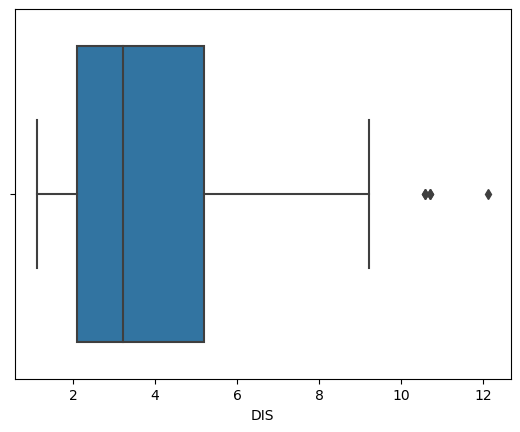

In [4]:
sns.boxplot(x=boston_df['DIS']);

* Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

## <b>II <span style='color:#85BB65'>|</span> Scatter plot </b> 

we can do multivariate outlier analysis too by scatter plot.

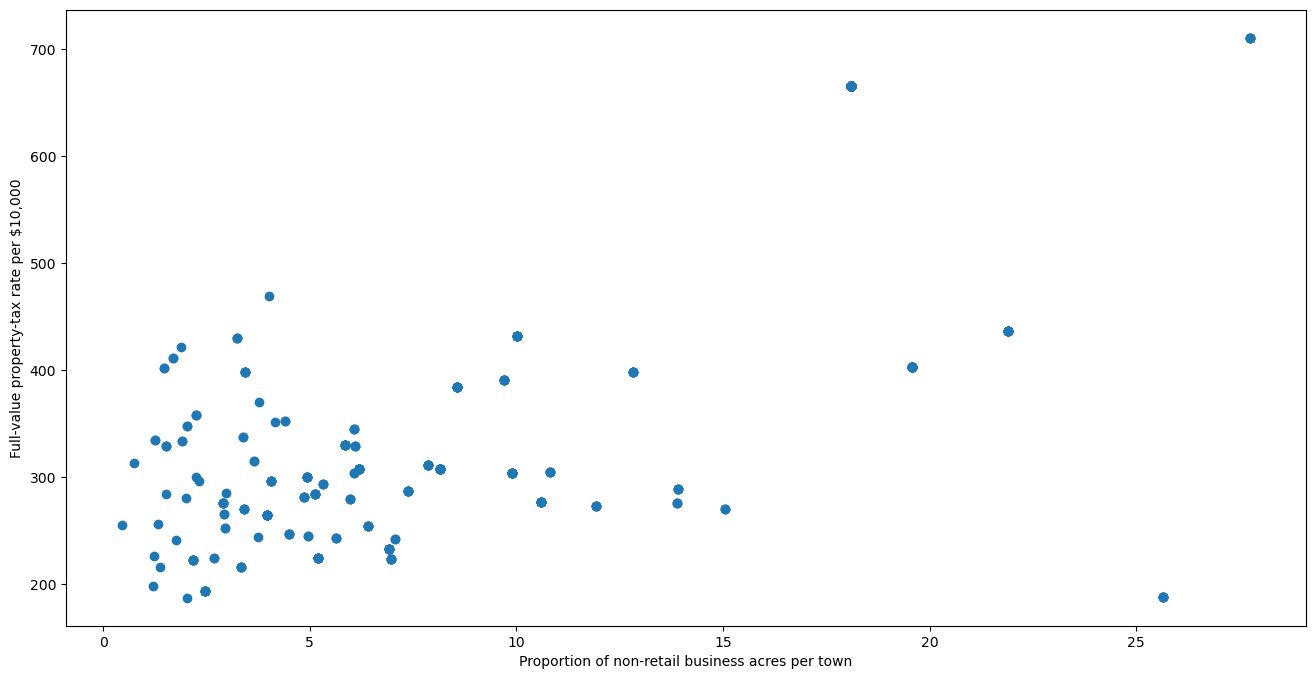

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

* we can most of data points are lying bottom left side but there are points which are far from the population like top right corner.

### <mark style="background-color:#85BB65;color:white;font-size:100%;border-radius:3px;opacity:2.0">Discover outliers with mathematical function </mark>

<br>

## <b>I <span style='color:#85BB65'>|</span> Z-Score </b> 


Z-score describes any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 (normal distribution).

while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [6]:
z = np.abs(stats.zscore(boston_df))
print(np.where(z > 3))

(array([102, 225, 257, 262, 351, 352, 353, 354, 355, 364, 365, 367, 374,
       406, 410, 411, 412, 415, 416, 418, 419, 423, 424, 425, 426, 427,
       429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
      dtype=int64), array([11,  5,  5,  5,  7,  7,  7,  7,  7,  5,  5,  5,  5,  5, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11], dtype=int64))


**The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.**

In [7]:
print(z.iloc[55,1])

nan


**So, the data point — 55th record on column ZN is an outlier.**

## <b>II <span style='color:#85BB65'>|</span> IQR score </b> 

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

In [8]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0      False  False  False  False  
1  

**Code gives an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.**

# **<span style='color:#85BB65'> How to deal with outliers? </span>**

**It is often necessary to assess the impact of outliers on data analysis or modeling and decide whether to remove or transform them, or if they should be retained as important information.**

## <b>I <span style='color:#85BB65'>|</span> Z-Score </b> 

we saw how one can detect the outlier using Z-score but now we want to remove or filter the outliers and get the clean data. 

In [9]:
df1 = boston_df.copy()
df1.shape

(506, 14)

In [10]:
df1 = df1[(z < 3).all(axis=1)]
df1.shape

(0, 14)

**Above code removed around 90+ rows from the dataset . Outliers have been removed.**

you can use this function to detect outliers and replace them with suitable value.

In [11]:
def deal_with_outliers_zscore(df, columns=None, threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns

    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = z_scores > threshold
        
        if df[col].dtype == "int":
            df.loc[outliers, col] = np.nan
            df[col].fillna(df[col].median(), inplace=True)
        elif df[col].dtype == "float":
            df.loc[outliers, col] = np.nan
            df[col].fillna(df[col].mean(), inplace=True)
    
    return df

In [12]:
df2 = boston_df.copy()
deal_with_outliers_zscore(df2)
df2.shape

(506, 14)

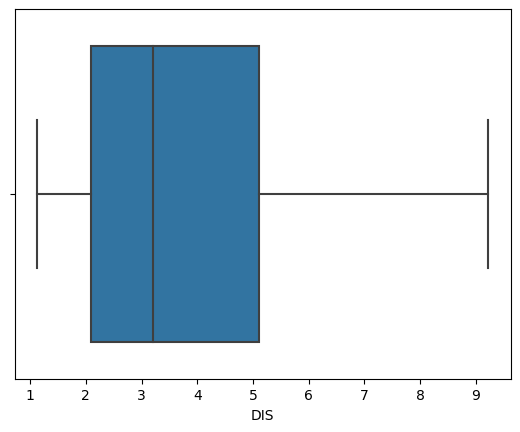

In [13]:
# check
sns.boxplot(x=df2['DIS']);

## <b>II <span style='color:#85BB65'>|</span> IQR Score </b> 


In [14]:
df3 = boston_df.copy()
df3.shape

(506, 14)

In [15]:
df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.shape

(273, 14)

**Above code removed alot of rows from the dataset . Outliers have been removed.**

you can use this function to detect outliers and replace them with suitable value. 


In [16]:
def deal_with_outliers_IQR(df , columns = None):
    
    '''Parameters:
    
        df: Dataframe containing the data
        columns: List of quantitative columns to check for outliers. If None, all quantitative columns will be checked.
        '''
    
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns

    for col in columns:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        # replace the outliers with the lower/upper bound with the median or mean of the column
        if df[col].dtype =="int":
            
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].median(), inplace=True)
            
        elif df[col].dtype =="float":
            
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].mean(), inplace=True)
            
    return df

In [17]:
df4 = boston_df.copy()
deal_with_outliers_IQR(df4)
df4.shape

(506, 14)

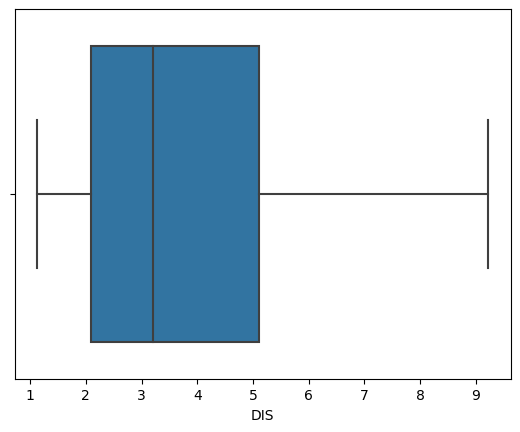

In [18]:
# check
sns.boxplot(x=df4['DIS']);

**Above code replace the outliers.**

There are multiple ways to detect and remove the outliers but the methods, we have used for this exercise, are widely used and easy to understand.

***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<br>
<br>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       I hope you find this article helpful and have learned some new things ❤
       If you find this notebook useful, I'd greatly appreciate your upvote!
   </span>
</div>
